# Red Wine Quality Classification using Logistic Regression and KNN

In [208]:
#Importing necessary modules
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [209]:
#Importing Red Wine Dataset
data = pd.read_csv("winequality-red.csv")

In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [211]:
# To count the number of Null Values in the features
data.isnull().sum() 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [212]:
data.head() #Displaying the first 5 data present in the dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


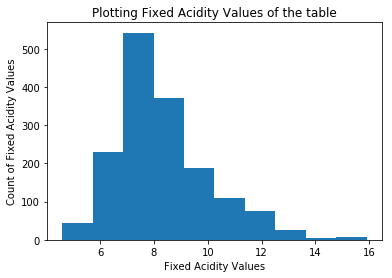

In [213]:
plt.hist(data["fixed acidity"],bins = 10)
plt.title("Plotting Fixed Acidity Values of the table")
plt.xlabel("Fixed Acidity Values")
plt.ylabel("Count of Fixed Acidity Values")
plt.show()

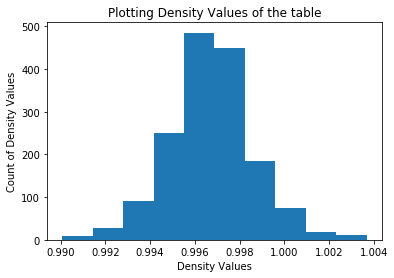

In [214]:
plt.hist(data["density"],bins=10)
plt.title("Plotting Density Values of the table")
plt.xlabel("Density Values")
plt.ylabel("Count of Density Values")
plt.show()

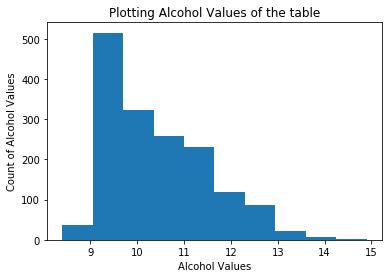

In [215]:
plt.hist(data["alcohol"],bins = 10)
plt.title("Plotting Alcohol Values of the table")
plt.xlabel("Alcohol Values")
plt.ylabel("Count of Alcohol Values")
plt.show()

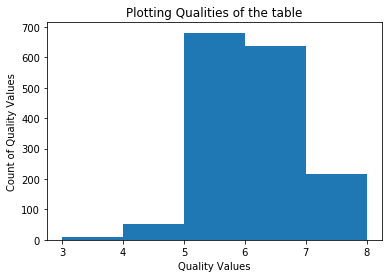

In [216]:
plt.hist(data["quality"],bins = 5)
plt.title("Plotting Qualities of the table")
plt.xlabel("Quality Values")
plt.ylabel("Count of Quality Values")
plt.show()

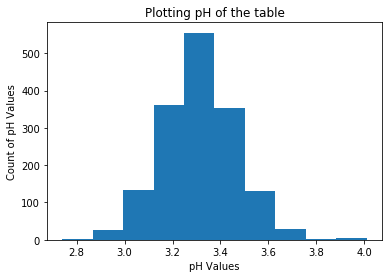

In [217]:
plt.hist(data["pH"],bins = 10)
plt.title("Plotting pH of the table")
plt.xlabel("pH Values")
plt.ylabel("Count of pH Values")
plt.show()

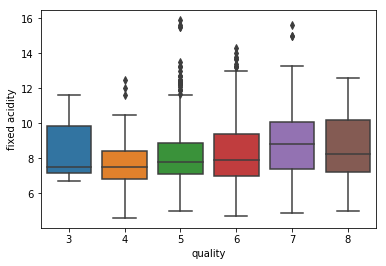

In [218]:
#Plot a boxplot to check for Outliers
#Target variable is Quality. So will plot a boxplot each column against target variable
sns.boxplot('quality', 'fixed acidity', data = data)

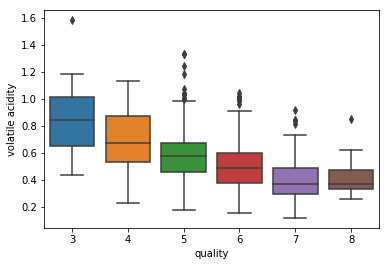

In [219]:
sns.boxplot('quality', 'volatile acidity', data = data)

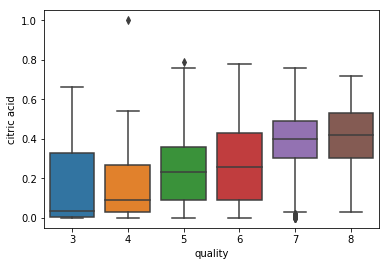

In [220]:
sns.boxplot('quality', 'citric acid', data = data)

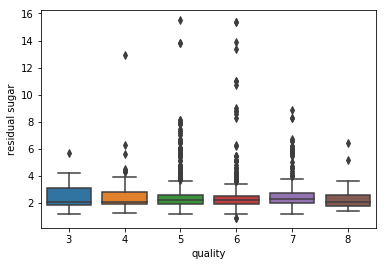

In [221]:
sns.boxplot('quality', 'residual sugar', data = data)

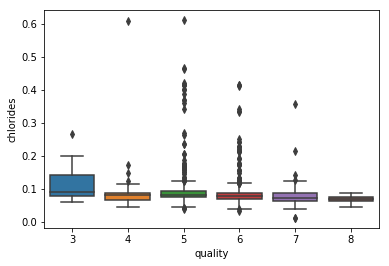

In [222]:
sns.boxplot('quality', 'chlorides', data = data)

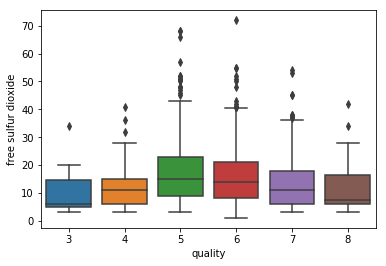

In [223]:
sns.boxplot('quality', 'free sulfur dioxide', data = data)

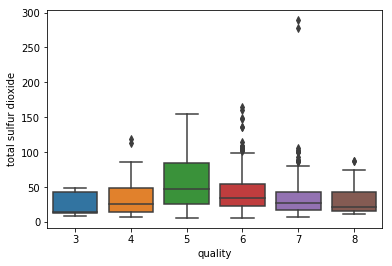

In [224]:
sns.boxplot('quality', 'total sulfur dioxide', data = data)

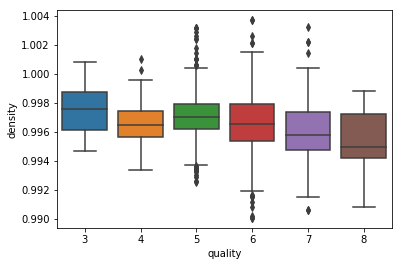

In [225]:
sns.boxplot('quality', 'density', data = data)

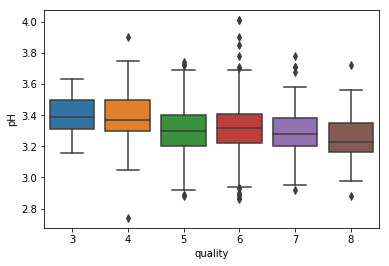

In [226]:
sns.boxplot('quality', 'pH', data = data)

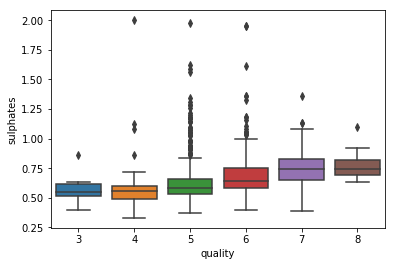

In [227]:
sns.boxplot('quality', 'sulphates', data = data)

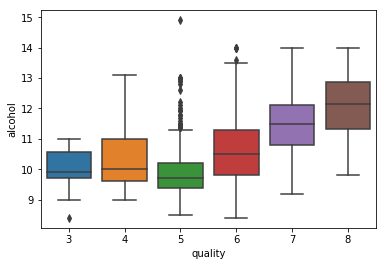

In [228]:
sns.boxplot('quality', 'alcohol', data = data)

In [229]:
#Describing the Dataset available
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [230]:
#Specifying the X and Y values
X = data.drop("quality",axis =1).values
Y = data["quality"].values

In [231]:
#Split the data into train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.10,random_state=5)

In [232]:
#Printing the shapes of testing and training datasets
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(1439, 11)
(1439,)
(160, 11)
(160,)


## Logistic Regression Classifier

In [233]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)

C:\Users\Abishek_G\.spyder-py3\New folder\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abishek_G\.spyder-py3\New folder\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [234]:
#print accuracy score
lr_acc_score = accuracy_score(y_test, lr_predict)
print(lr_acc_score*100)

67.5


67.5% accuracy with Logistic Regression!

## KNN Classifier

In [235]:
from sklearn.neighbors import KNeighborsClassifier
dt = KNeighborsClassifier()
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)


In [236]:
#print accuracy score
dt_acc_score = accuracy_score(y_test, dt_predict)
print(dt_acc_score*100)

58.75


58.75% accuracy with K-nearest Neighbor Classifier